# Compare Python and Fortran outputs
Note: Fortran GMET outputs are contained in this folder, based on the latest run based on compiled GMET on NCAR Cheyenne. The outputs contained in the compressed file seem out of date by 2023-3-21.

In [1]:
import pandas as pd
import xarray as xr
import numpy as np
from array import array
import matplotlib.pyplot as plt

## Only static predictors are used
['latitude', 'longitude', 'elev', 'gradient_n_s', 'gradient_w_e']
For precipitation (box-cox), current verison of Fortran GMET forces transformed precipitation to zero while the transformation exponent (-4) should be used. 

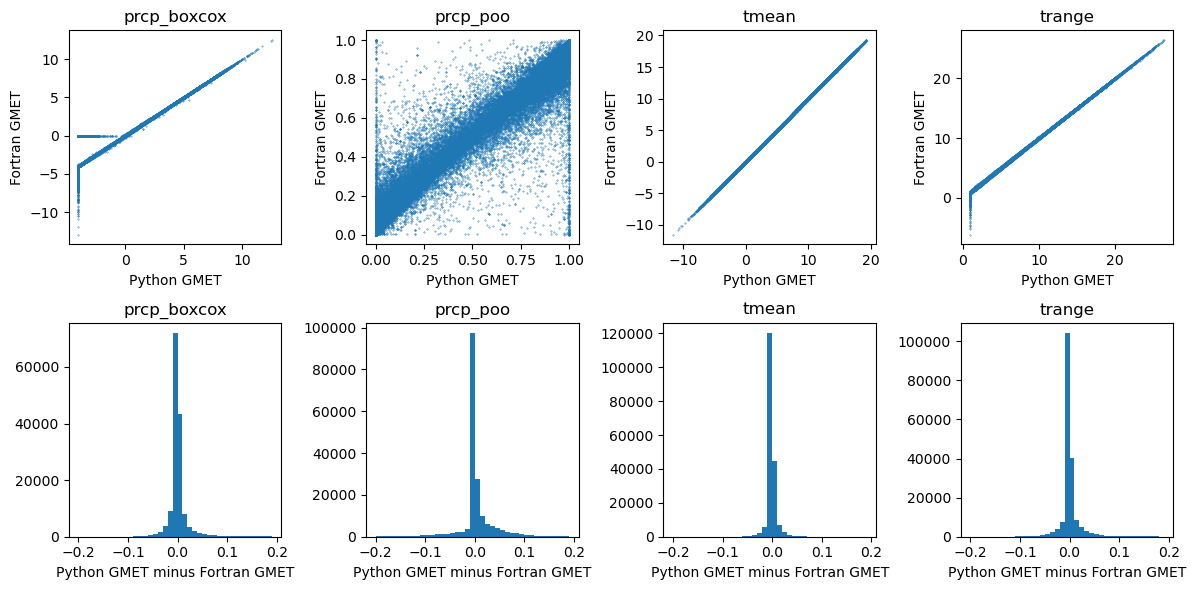

In [2]:
infile_py = '../test_cases/cali2017/PyGMET_output/regression_outputs/LWLRstatic_Grid_Regression_20170201-20170215.nc'
infile_ft = 'regress_ts.nwp.xv_static.nc'

dspy = xr.load_dataset(infile_py)
dsft = xr.load_dataset(infile_ft)

varpy = ['prcp_boxcox', 'prcp_poo', 'tmean', 'trange']
varft = ['pcp', 'pop', 'tmean', 'trange']

fig, axs = plt.subplots(2, 4, figsize=[12, 6])

for i in range(4):
    
    d1 = dspy[varpy[i]].values.transpose([2,0,1])
    d2 = dsft[varft[i]].values
    d1 = d1.flatten()
    d2 = d2.flatten()
    
    axi = axs[0, i]
    axi.scatter(d1,d2, 0.1)
    axi.set_xlabel('Python GMET')
    axi.set_ylabel('Fortran GMET')
    axi.set_title(varpy[i])
    
    axi = axs[1, i]
    axi.hist(d1-d2, np.arange(-0.2, 0.2, 0.01))
    axi.set_xlabel('Python GMET minus Fortran GMET')
    axi.set_title(varpy[i])

plt.tight_layout()
plt.show()

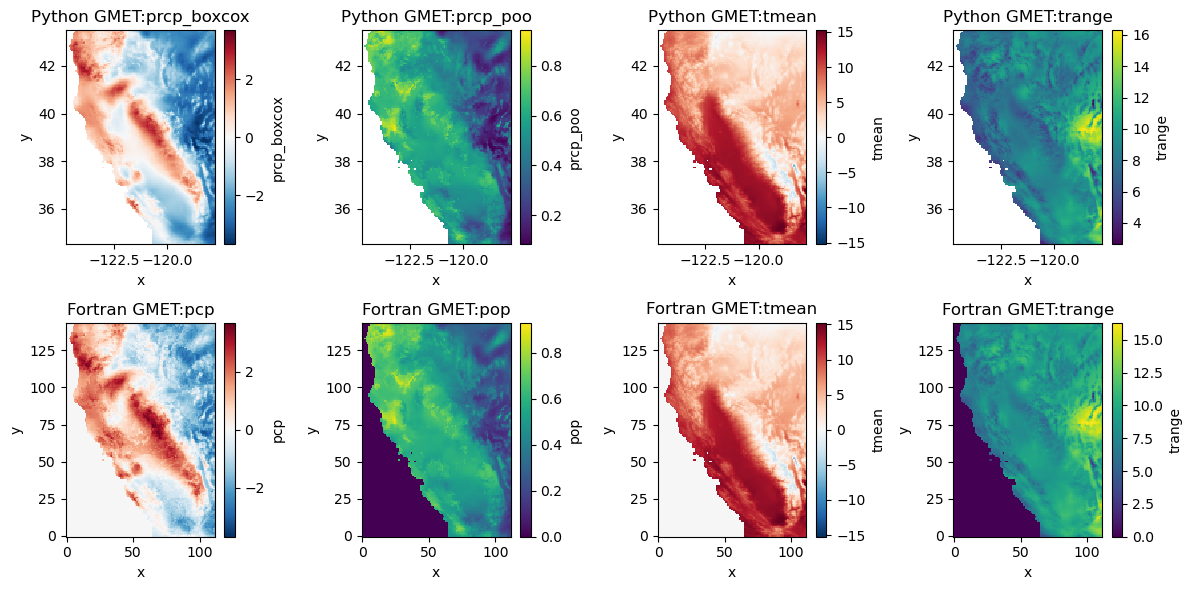

In [3]:
infile_py = '../test_cases/cali2017/PyGMET_output/regression_outputs/LWLRstatic_Grid_Regression_20170201-20170215.nc'
infile_ft = 'regress_ts.nwp.xv_static.nc'

dspy = xr.load_dataset(infile_py)
dsft = xr.load_dataset(infile_ft)

varpy = ['prcp_boxcox', 'prcp_poo', 'tmean', 'trange']
varft = ['pcp', 'pop', 'tmean', 'trange']

fig, axs = plt.subplots(2, 4, figsize=[12, 6])

for i in range(4):
    
    d1 = dspy[varpy[i]].values.transpose([2,0,1])
    d2 = dsft[varft[i]].values
    d1 = d1.flatten()
    d2 = d2.flatten()
    
    axi = axs[0, i]
    dspy[varpy[i]].mean(dim='time').plot(ax=axi)
    axi.set_title('Python GMET:'+varpy[i])
    
    axi = axs[1, i]
    dsft[varft[i]].mean(dim='time').plot(ax=axi)
    axi.set_title('Fortran GMET:'+varft[i])

plt.tight_layout()
plt.show()

## Dynamic + static factors are used
Dynamic factors are 'cube_root_prec_rate' and 'tmp_2m'. Grid-point match uses nearest neighbor method. Don't transform precipitation.

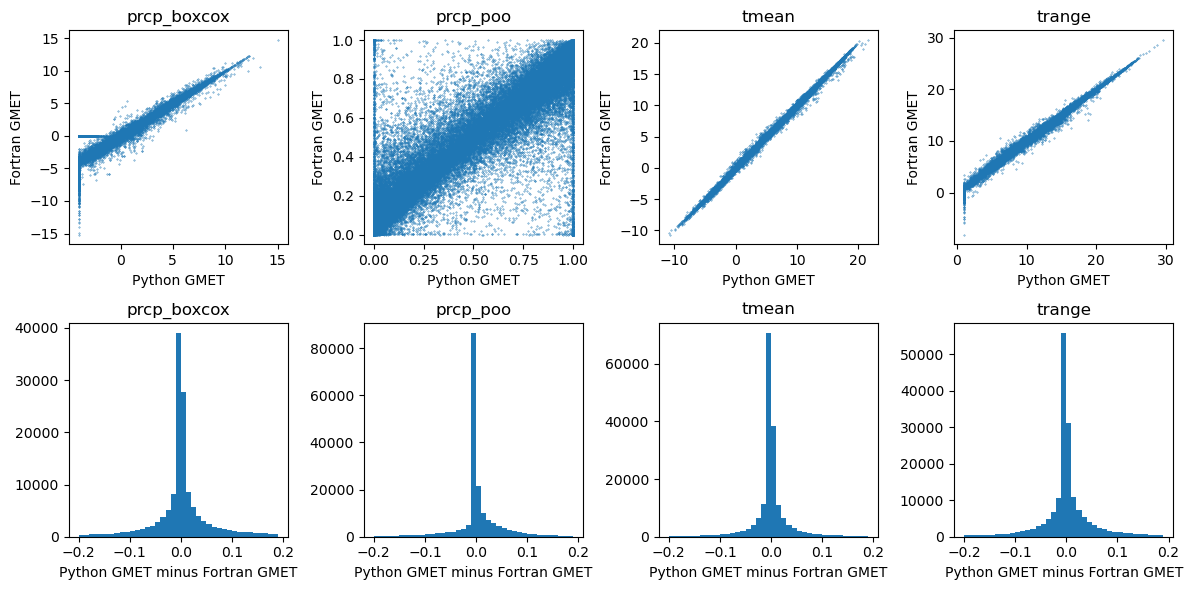

In [4]:
infile_py = '../test_cases/cali2017/PyGMET_output/regression_outputs/LWLRdynamic_Grid_Regression_20170201-20170215.nc'
infile_ft = 'regress_ts.nwp.xv_dynamic.nc'

dspy = xr.load_dataset(infile_py)
dsft = xr.load_dataset(infile_ft)

varpy = ['prcp_boxcox', 'prcp_poo', 'tmean', 'trange']
varft = ['pcp', 'pop', 'tmean', 'trange']

fig, axs = plt.subplots(2, 4, figsize=[12, 6])

for i in range(4):
    
    d1 = dspy[varpy[i]].values.transpose([2,0,1])
    d2 = dsft[varft[i]].values
    d1 = d1.flatten()
    d2 = d2.flatten()
    
    axi = axs[0, i]
    axi.scatter(d1,d2, 0.1)
    axi.set_xlabel('Python GMET')
    axi.set_ylabel('Fortran GMET')
    axi.set_title(varpy[i])
    
    axi = axs[1, i]
    axi.hist(d1-d2, np.arange(-0.2, 0.2, 0.01))
    axi.set_xlabel('Python GMET minus Fortran GMET')
    axi.set_title(varpy[i])

plt.tight_layout()
plt.show()

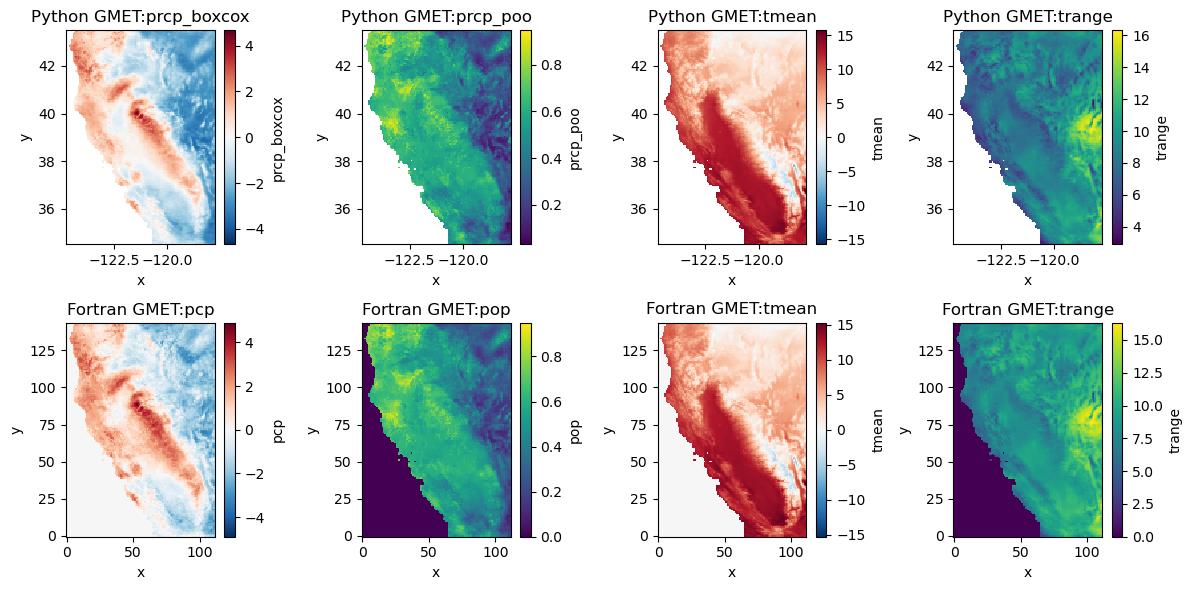

In [5]:
infile_py = '../test_cases/cali2017/PyGMET_output/regression_outputs/LWLRdynamic_Grid_Regression_20170201-20170215.nc'
infile_ft = 'regress_ts.nwp.xv_dynamic.nc'

dspy = xr.load_dataset(infile_py)
dsft = xr.load_dataset(infile_ft)

varpy = ['prcp_boxcox', 'prcp_poo', 'tmean', 'trange']
varft = ['pcp', 'pop', 'tmean', 'trange']

fig, axs = plt.subplots(2, 4, figsize=[12, 6])

for i in range(4):
    
    d1 = dspy[varpy[i]].values.transpose([2,0,1])
    d2 = dsft[varft[i]].values
    d1 = d1.flatten()
    d2 = d2.flatten()
    
    axi = axs[0, i]
    dspy[varpy[i]].mean(dim='time').plot(ax=axi)
    axi.set_title('Python GMET:'+varpy[i])
    
    axi = axs[1, i]
    dsft[varft[i]].mean(dim='time').plot(ax=axi)
    axi.set_title('Fortran GMET:'+varft[i])

plt.tight_layout()
plt.show()